In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### Step1. 開 PCA 機

In [6]:
pca = PCA(n_components=2)

### Step2. 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Step3. 預測

In [9]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [10]:
X = pca.transform(x)

In [11]:
X[87]

array([ 0.81509524, -0.37203706])

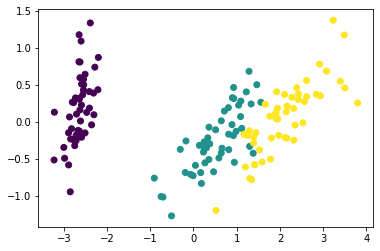

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)

### 準備訓練/測試資料

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step1 : 開SVC函數學習機

In [17]:
from sklearn.svm import SVC

In [19]:
clf = SVC(gamma="auto")

### Step2 : 訓練

In [20]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step3 : 預測

In [22]:
y_predict = clf.predict(x_test)

In [23]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

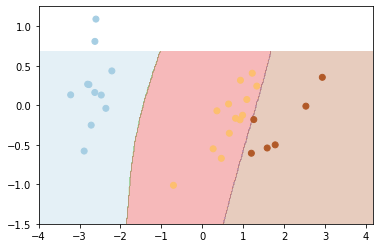

In [24]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 0.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.3)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="Paired")

## K-Means 自動分類

In [25]:
x = np.random.rand(100, 2)

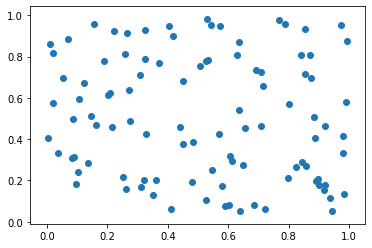

In [26]:
plt.scatter(x[:, 0], x[:, 1])

### Step1. 打開 K-Means 學習機

In [27]:
from sklearn.cluster import KMeans

In [28]:
clf = KMeans(n_clusters=3)

### Step2. 學習(訓練)

In [29]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step3. 預測

In [30]:
clf.predict(x)

array([2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0], dtype=int32)

In [31]:
clf.labels_

array([2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0], dtype=int32)

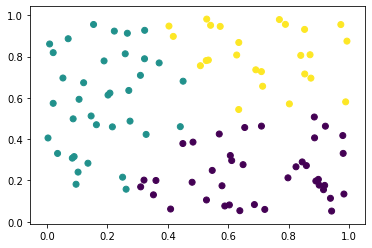

In [32]:
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_)

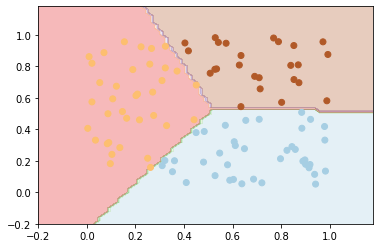

In [33]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, cmap="Paired")

## "make_blobs" 生更像真實世界的東西

In [35]:
from sklearn.datasets.samples_generator import make_blobs

In [36]:
x, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=0)

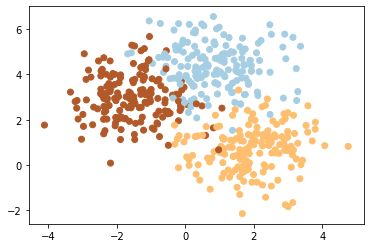

In [37]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="Paired")

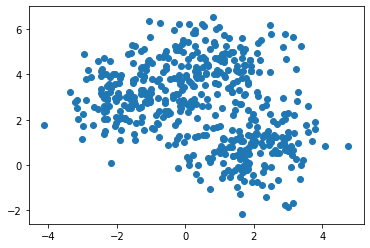

In [38]:
plt.scatter(x[:, 0], x[:, 1])

### Step1. 打開 KMeans 函數學習機

In [39]:
clf = KMeans(n_clusters=3)

### Step2. 訓練

In [41]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step3. 預測

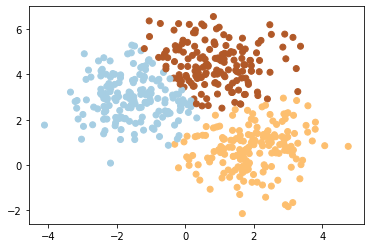

In [42]:
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, cmap="Paired")

## Means-Shifts 完全自動分類

### Step1. 打開函數學習機

In [43]:
from sklearn.cluster import MeanShift

In [48]:
clf = MeanShift(bandwidth=0.2)

### Step2. 訓練

In [49]:
clf.fit(x)

MeanShift(bandwidth=0.2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### Step3. 預測

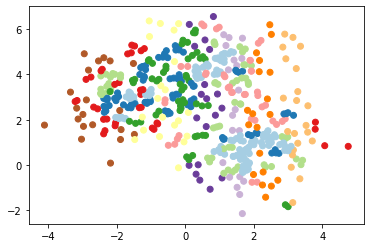

In [50]:
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, cmap="Paired")

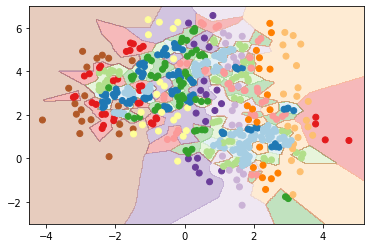

In [54]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, cmap="Paired")

## "cross_val_score"

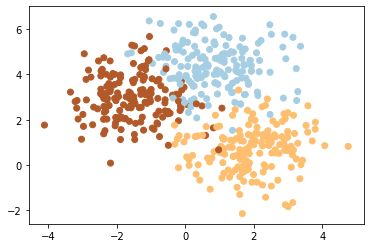

In [75]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="Paired")

In [64]:
from sklearn.model_selection import cross_val_score

## SVC

In [76]:
from sklearn.svm import SVC

In [77]:
clf = SVC(gamma="auto")

In [78]:
scores = cross_val_score(clf, x, y, cv=5)

In [79]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [80]:
scores.max()

0.98989898989899

In [81]:
scores.mean()

0.9420106716554008

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
clf = DecisionTreeClassifier()

In [86]:
scores = cross_val_score(clf, x, y, cv=5)

In [87]:
scores.max()

0.9595959595959596

In [88]:
scores.mean()

0.9119864927669237

## Ramdom Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
clf = RandomForestClassifier(n_estimators=100)

In [91]:
scores = cross_val_score(clf, x, y, cv=5)

In [92]:
scores

array([0.92156863, 0.92079208, 0.96969697, 0.88888889, 0.88888889])

In [94]:
scores.max()

0.9696969696969697

In [95]:
scores.mean()

0.9179670908267298